In [1]:
# Cargar las librerias y recursos necesarios.

import pandas as pd
from sklearn.model_selection import train_test_split
!pip install transformers
from transformers import BertTokenizer, TFBertForSequenceClassification

#transformers
from transformers import BertTokenizerFast
from transformers import TFBertModel
from transformers import RobertaTokenizerFast
from transformers import TFRobertaModel

In [2]:
from sklearn.utils import shuffle
# Cargar datos preprocesados
#train_data = pd.read_csv('/content/EXIST2021_training.tsv', delimiter=',', encoding='latin1')
#test_data = pd.read_csv('/content/EXIST2021_test_labeled.tsv', delimiter=',', encoding='latin1')

test_data = pd.read_csv('/content/test.csv', sep=',')
train_data = pd.read_csv('/content/train.csv', sep=',')
# Mezclar los datos de entrenamiento
shuffled_train_data = shuffle(train_data, random_state=42)

# Mezclar los datos de prueba
shuffled_test_data = shuffle(test_data, random_state=42)

In [3]:
shuffled_train_data.head(10)

,id,keyword,location,text,target
2644,3796,destruction,NaN,So you have a new weapon that can cause un-ima...,1
2227,3185,deluge,NaN,The f$&amp;@ing things I do for #GISHWHES Just...,0
5448,7769,police,UK,DT @georgegalloway: RT @Galloway4Mayor: ÛÏThe...,1
132,191,aftershock,NaN,Aftershock back to school kick off was great. ...,0
6845,9810,trauma,"Montgomery County, MD",in response to trauma Children of Addicts deve...,0
5559,7934,rainstorm,NaN,@Calum5SOS you look like you got caught in a r...,0
1765,2538,collision,NaN,my favorite lady came to our volunteer meeting...,1
1817,2611,crashed,NaN,@brianroemmele UX fail of EMV - people want to...,1
6810,9756,tragedy,"Los Angeles, CA",Can't find my ariana grande shirt this is a f...,0
4398,6254,hijacking,"Athens,Greece",The Murderous Story Of AmericaÛªs First Hijac...,1


In [4]:
print(shuffled_train_data.info())
print(shuffled_train_data.describe())


<class 'pandas.core.frame.DataFrame'>
Int64Index: 7613 entries, 2644 to 7270
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   id        7613 non-null   int64 
 1   keyword   7552 non-null   object
 2   location  5080 non-null   object
 3   text      7613 non-null   object
 4   target    7613 non-null   int64 
dtypes: int64(2), object(3)
memory usage: 356.9+ KB
None
                 id      target
count   7613.000000  7613.00000
mean    5441.934848     0.42966
std     3137.116090     0.49506
min        1.000000     0.00000
25%     2734.000000     0.00000
50%     5408.000000     0.00000
75%     8146.000000     1.00000
max    10873.000000     1.00000


In [5]:
print(shuffled_train_data.isnull().sum())


id             0
keyword       61
location    2533
text           0
target         0
dtype: int64


<Axes: >

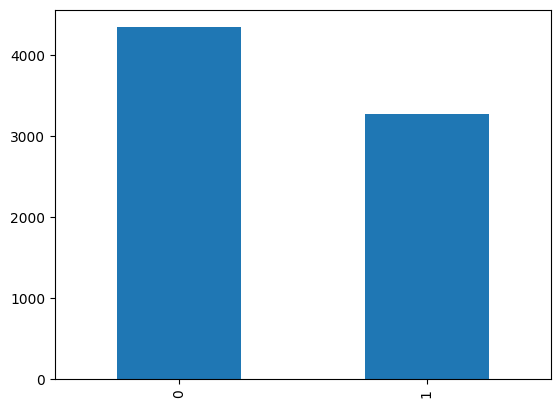

In [6]:
shuffled_train_data['target'].value_counts().plot(kind='bar')


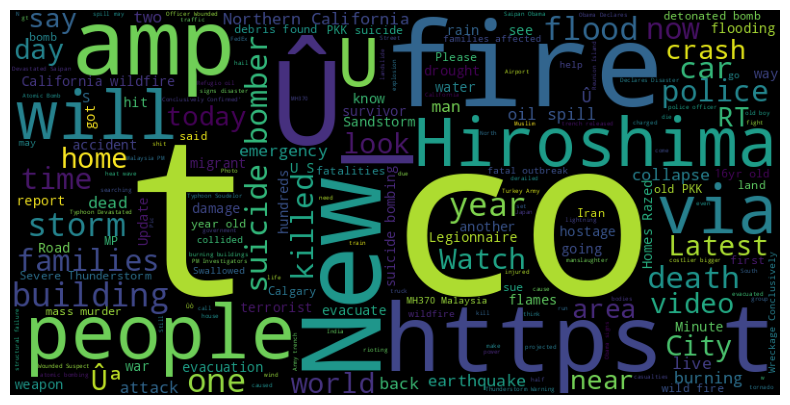

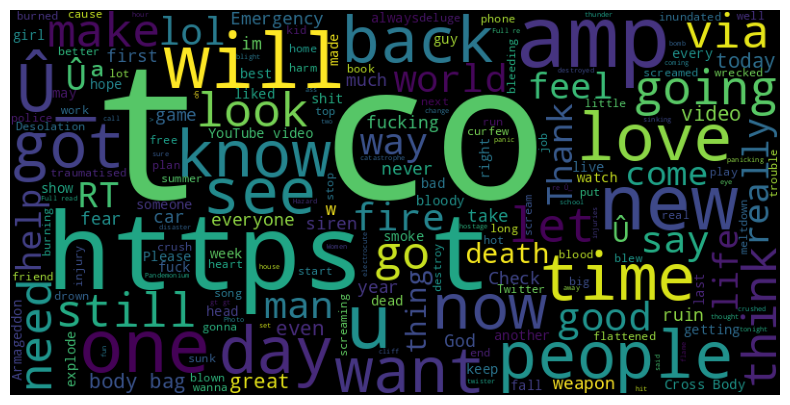

In [7]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# WordCloud para textos donde target es 1
disaster_texts = ' '.join(shuffled_train_data[shuffled_train_data['target'] == 1]['text'])
wordcloud = WordCloud(width=800, height=400).generate(disaster_texts)
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud)
plt.axis('off')
plt.show()

# WordCloud para textos donde target es 0
non_disaster_texts = ' '.join(shuffled_train_data[shuffled_train_data['target'] == 0]['text'])
wordcloud = WordCloud(width=800, height=400).generate(non_disaster_texts)
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud)
plt.axis('off')
plt.show()


<Axes: title={'center': 'text_length'}, xlabel='target'>

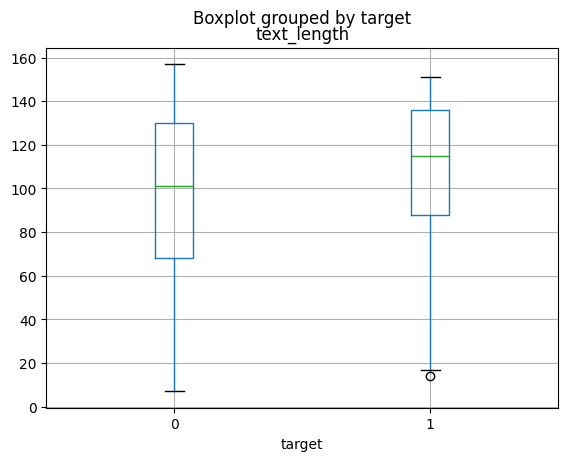

In [8]:
shuffled_train_data['text_length'] = shuffled_train_data['text'].apply(len)
shuffled_train_data.boxplot(column='text_length', by='target')


<Axes: >

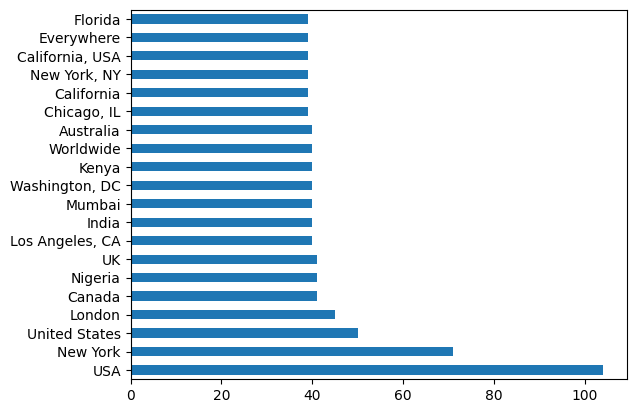

In [9]:
shuffled_train_data['keyword'].value_counts().head(20).plot(kind='barh')
shuffled_train_data['location'].value_counts().head(20).plot(kind='barh')


In [10]:
# Calcular la longitud de cada texto.
shuffled_train_data['text_length'] = shuffled_train_data['text'].apply(len)

# Encontrar la longitud máxima de los textos.
max_text_length = shuffled_train_data['text_length'].max()
max_text_length

157

Falta saber la longitud máxima de tokens al tokenizar ya que permitirá un ajuste más fino a nivel re recursos y eficiencia.